In [ ]:
import pandas as pd
df = pd.read_csv("/content/House Pricing.csv")
print(df[0:10])


      crim    zn  indus  chas    nox     rm    age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.6

In [ ]:
age = df['age']
bins = [2, 30, 60, 100]
labels = ['Young', 'Middle-aged', 'Old']
df['CATEGORY'] = pd.cut(df['age'], bins=bins, labels=labels)
binary_matrix = pd.get_dummies(df['CATEGORY'])
print(binary_matrix)


     Young  Middle-aged  Old
0        0            0    1
1        0            0    1
2        0            0    1
3        0            1    0
4        0            1    0
..     ...          ...  ...
501      0            0    1
502      0            0    1
503      0            0    1
504      0            0    1
505      0            0    1

[506 rows x 3 columns]


In [ ]:
df['is_charles_river'] = df['chas'].apply(lambda x: 1 if x == 1 else 0)
print(df)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv     CATEGORY  is_charles_river  
0       15.3  396.90   4.98  24.0          Old          

**Detecting Outliers**

In [ ]:
Q1 = df['crim'].quantile(0.25)
Q3 = df['crim'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['crim'] < lower_bound) | (df['crim'] > upper_bound)]

print(outliers)








        crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
367  13.5222  0.0   18.1     0  0.631  3.863  100.0  1.5106   24  666   
371   9.2323  0.0   18.1     0  0.631  6.216  100.0  1.1691   24  666   
373  11.1081  0.0   18.1     0  0.668  4.906  100.0  1.1742   24  666   
374  18.4982  0.0   18.1     0  0.668  4.138  100.0  1.1370   24  666   
375  19.6091  0.0   18.1     0  0.671  7.313   97.9  1.3163   24  666   
..       ...  ...    ...   ...    ...    ...    ...     ...  ...  ...   
468  15.5757  0.0   18.1     0  0.580  5.926   71.0  2.9084   24  666   
469  13.0751  0.0   18.1     0  0.580  5.713   56.7  2.8237   24  666   
477  15.0234  0.0   18.1     0  0.614  5.304   97.3  2.1007   24  666   
478  10.2330  0.0   18.1     0  0.614  6.185   96.7  2.1705   24  666   
479  14.3337  0.0   18.1     0  0.614  6.229   88.0  1.9512   24  666   

     ptratio       b  lstat  medv     CATEGORY  is_charles_river  
367     20.2  131.42  13.33  23.1          Old          

In [ ]:
Q1 = df['zn'].quantile(0.25)
Q3 = df['zn'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['zn'] < lower_bound) | (df['zn'] > upper_bound)]

print(outliers)








        crim    zn  indus  chas    nox     rm   age      dis  rad  tax  \
39   0.02763  75.0   2.95     0  0.428  6.595  21.8   5.4011    3  252   
40   0.03359  75.0   2.95     0  0.428  7.024  15.8   5.4011    3  252   
54   0.01360  75.0   4.00     0  0.410  5.888  47.6   7.3197    3  469   
55   0.01311  90.0   1.22     0  0.403  7.249  21.9   8.6966    5  226   
56   0.02055  85.0   0.74     0  0.410  6.383  35.7   9.1876    2  313   
..       ...   ...    ...   ...    ...    ...   ...      ...  ...  ...   
351  0.07950  60.0   1.69     0  0.411  6.579  35.9  10.7103    4  411   
352  0.07244  60.0   1.69     0  0.411  5.884  18.5  10.7103    4  411   
353  0.01709  90.0   2.02     0  0.410  6.728  36.1  12.1265    5  187   
354  0.04301  80.0   1.91     0  0.413  5.663  21.9  10.5857    4  334   
355  0.10659  80.0   1.91     0  0.413  5.936  19.5  10.5857    4  334   

     ptratio       b  lstat  medv     CATEGORY  is_charles_river  
39      18.3  395.63   4.32  30.8        You

In [ ]:
Q1 = df['indus'].quantile(0.25)
Q3 = df['indus'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['indus'] < lower_bound) | (df['indus'] > upper_bound)]

print(outliers)








Empty DataFrame
Columns: [crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat, medv, CATEGORY, is_charles_river]
Index: []


In [ ]:
Q1 = df['chas'].quantile(0.25)
Q3 = df['chas'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['chas'] < lower_bound) | (df['chas'] > upper_bound)]

print(outliers)








        crim    zn  indus  chas     nox     rm    age     dis  rad  tax  \
142  3.32105   0.0  19.58     1  0.8710  5.403  100.0  1.3216    5  403   
152  1.12658   0.0  19.58     1  0.8710  5.012   88.0  1.6102    5  403   
154  1.41385   0.0  19.58     1  0.8710  6.129   96.0  1.7494    5  403   
155  3.53501   0.0  19.58     1  0.8710  6.152   82.6  1.7455    5  403   
160  1.27346   0.0  19.58     1  0.6050  6.250   92.6  1.7984    5  403   
162  1.83377   0.0  19.58     1  0.6050  7.802   98.2  2.0407    5  403   
163  1.51902   0.0  19.58     1  0.6050  8.375   93.9  2.1620    5  403   
208  0.13587   0.0  10.59     1  0.4890  6.064   59.1  4.2392    4  277   
209  0.43571   0.0  10.59     1  0.4890  5.344  100.0  3.8750    4  277   
210  0.17446   0.0  10.59     1  0.4890  5.960   92.1  3.8771    4  277   
211  0.37578   0.0  10.59     1  0.4890  5.404   88.6  3.6650    4  277   
212  0.21719   0.0  10.59     1  0.4890  5.807   53.8  3.6526    4  277   
216  0.04560   0.0  13.89

In [ ]:
Q1 = df['nox'].quantile(0.25)
Q3 = df['nox'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['nox'] < lower_bound) | (df['nox'] > upper_bound)]

print(outliers)








Empty DataFrame
Columns: [crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat, medv, CATEGORY, is_charles_river]
Index: []


In [ ]:
Q1 = df['rm'].quantile(0.25)
Q3 = df['rm'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['rm'] < lower_bound) | (df['rm'] > upper_bound)]

print(outliers)








         crim    zn  indus  chas     nox     rm    age     dis  rad  tax  \
97    0.12083   0.0   2.89     0  0.4450  8.069   76.0  3.4952    2  276   
98    0.08187   0.0   2.89     0  0.4450  7.820   36.9  3.4952    2  276   
162   1.83377   0.0  19.58     1  0.6050  7.802   98.2  2.0407    5  403   
163   1.51902   0.0  19.58     1  0.6050  8.375   93.9  2.1620    5  403   
166   2.01019   0.0  19.58     0  0.6050  7.929   96.2  2.0459    5  403   
180   0.06588   0.0   2.46     0  0.4880  7.765   83.3  2.7410    3  193   
186   0.05602   0.0   2.46     0  0.4880  7.831   53.6  3.1992    3  193   
195   0.01381  80.0   0.46     0  0.4220  7.875   32.0  5.6484    4  255   
203   0.03510  95.0   2.68     0  0.4161  7.853   33.2  5.1180    4  224   
204   0.02009  95.0   2.68     0  0.4161  8.034   31.9  5.1180    4  224   
224   0.31533   0.0   6.20     0  0.5040  8.266   78.3  2.8944    8  307   
225   0.52693   0.0   6.20     0  0.5040  8.725   83.0  2.8944    8  307   
226   0.3821

In [ ]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

print(outliers)








Empty DataFrame
Columns: [crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat, medv, CATEGORY, is_charles_river]
Index: []


In [ ]:
Q1 = df['dis'].quantile(0.25)
Q3 = df['dis'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['dis'] < lower_bound) | (df['dis'] > upper_bound)]

print(outliers)








        crim    zn  indus  chas    nox     rm   age      dis  rad  tax  \
351  0.07950  60.0   1.69     0  0.411  6.579  35.9  10.7103    4  411   
352  0.07244  60.0   1.69     0  0.411  5.884  18.5  10.7103    4  411   
353  0.01709  90.0   2.02     0  0.410  6.728  36.1  12.1265    5  187   
354  0.04301  80.0   1.91     0  0.413  5.663  21.9  10.5857    4  334   
355  0.10659  80.0   1.91     0  0.413  5.936  19.5  10.5857    4  334   

     ptratio       b  lstat  medv     CATEGORY  is_charles_river  
351     18.3  370.78   5.49  24.1  Middle-aged                 0  
352     18.3  392.33   7.79  18.6        Young                 0  
353     17.0  384.46   4.50  30.1  Middle-aged                 0  
354     22.0  382.80   8.05  18.2        Young                 0  
355     22.0  376.04   5.57  20.6        Young                 0  


In [ ]:
Q1 = df['rad'].quantile(0.25)
Q3 = df['rad'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['rad'] < lower_bound) | (df['rad'] > upper_bound)]

print(outliers)








Empty DataFrame
Columns: [crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat, medv, CATEGORY, is_charles_river]
Index: []


In [ ]:
Q1 = df['tax'].quantile(0.25)
Q3 = df['tax'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['tax'] < lower_bound) | (df['tax'] > upper_bound)]

print(outliers)








Empty DataFrame
Columns: [crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat, medv, CATEGORY, is_charles_river]
Index: []


In [ ]:
Q1 = df['ptratio'].quantile(0.25)
Q3 = df['ptratio'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['ptratio'] < lower_bound) | (df['ptratio'] > upper_bound)]

print(outliers)








        crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
196  0.04011  80.0   1.52     0  0.404  7.287   34.1  7.3090    2  329   
197  0.04666  80.0   1.52     0  0.404  7.107   36.6  7.3090    2  329   
198  0.03768  80.0   1.52     0  0.404  7.274   38.3  7.3090    2  329   
257  0.61154  20.0   3.97     0  0.647  8.704   86.9  1.8010    5  264   
258  0.66351  20.0   3.97     0  0.647  7.333  100.0  1.8946    5  264   
259  0.65665  20.0   3.97     0  0.647  6.842  100.0  2.0107    5  264   
260  0.54011  20.0   3.97     0  0.647  7.203   81.8  2.1121    5  264   
261  0.53412  20.0   3.97     0  0.647  7.520   89.4  2.1398    5  264   
262  0.52014  20.0   3.97     0  0.647  8.398   91.5  2.2885    5  264   
263  0.82526  20.0   3.97     0  0.647  7.327   94.5  2.0788    5  264   
264  0.55007  20.0   3.97     0  0.647  7.206   91.6  1.9301    5  264   
265  0.76162  20.0   3.97     0  0.647  5.560   62.8  1.9865    5  264   
266  0.78570  20.0   3.97     0  0.647

In [ ]:
Q1 = df['b'].quantile(0.25)
Q3 = df['b'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['b'] < lower_bound) | (df['b'] > upper_bound)]

print(outliers)








        crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
18   0.80271  0.0   8.14     0  0.538  5.456  36.6  3.7965    4  307     21.0   
25   0.84054  0.0   8.14     0  0.538  5.599  85.7  4.4546    4  307     21.0   
27   0.95577  0.0   8.14     0  0.538  6.047  88.8  4.4534    4  307     21.0   
32   1.38799  0.0   8.14     0  0.538  5.950  82.0  3.9900    4  307     21.0   
34   1.61282  0.0   8.14     0  0.538  6.096  96.9  3.7598    4  307     21.0   
..       ...  ...    ...   ...    ...    ...   ...     ...  ...  ...      ...   
466  3.77498  0.0  18.10     0  0.655  5.952  84.7  2.8715   24  666     20.2   
467  4.42228  0.0  18.10     0  0.584  6.003  94.5  2.5403   24  666     20.2   
475  6.39312  0.0  18.10     0  0.584  6.162  97.4  2.2060   24  666     20.2   
489  0.18337  0.0  27.74     0  0.609  5.414  98.3  1.7554    4  711     20.1   
490  0.20746  0.0  27.74     0  0.609  5.093  98.0  1.8226    4  711     20.1   

          b  lstat  medv   

In [ ]:
Q1 = df['lstat'].quantile(0.25)
Q3 = df['lstat'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['lstat'] < lower_bound) | (df['lstat'] > upper_bound)]

print(outliers)








         crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
141   1.62864  0.0  21.89     0  0.624  5.019  100.0  1.4394    4  437   
373  11.10810  0.0  18.10     0  0.668  4.906  100.0  1.1742   24  666   
374  18.49820  0.0  18.10     0  0.668  4.138  100.0  1.1370   24  666   
387  22.59710  0.0  18.10     0  0.700  5.000   89.5  1.5184   24  666   
412  18.81100  0.0  18.10     0  0.597  4.628  100.0  1.5539   24  666   
414  45.74610  0.0  18.10     0  0.693  4.519  100.0  1.6582   24  666   
438  13.67810  0.0  18.10     0  0.740  5.935   87.9  1.8206   24  666   

     ptratio       b  lstat  medv CATEGORY  is_charles_river  
141     21.2  396.90  34.41  14.4      Old                 0  
373     20.2  396.90  34.77  13.8      Old                 0  
374     20.2  396.90  37.97  13.8      Old                 0  
387     20.2  396.90  31.99   7.4      Old                 0  
412     20.2   28.79  34.37  17.9      Old                 0  
414     20.2   88.27  36.98  

In [ ]:
Q1 = df['medv'].quantile(0.25)
Q3 = df['medv'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['medv'] < lower_bound) | (df['medv'] > upper_bound)]

print(outliers)








         crim    zn  indus  chas     nox     rm    age     dis  rad  tax  \
97    0.12083   0.0   2.89     0  0.4450  8.069   76.0  3.4952    2  276   
98    0.08187   0.0   2.89     0  0.4450  7.820   36.9  3.4952    2  276   
157   1.22358   0.0  19.58     0  0.6050  6.943   97.4  1.8773    5  403   
161   1.46336   0.0  19.58     0  0.6050  7.489   90.8  1.9709    5  403   
162   1.83377   0.0  19.58     1  0.6050  7.802   98.2  2.0407    5  403   
163   1.51902   0.0  19.58     1  0.6050  8.375   93.9  2.1620    5  403   
166   2.01019   0.0  19.58     0  0.6050  7.929   96.2  2.0459    5  403   
179   0.05780   0.0   2.46     0  0.4880  6.980   58.4  2.8290    3  193   
180   0.06588   0.0   2.46     0  0.4880  7.765   83.3  2.7410    3  193   
182   0.09103   0.0   2.46     0  0.4880  7.155   92.2  2.7006    3  193   
186   0.05602   0.0   2.46     0  0.4880  7.831   53.6  3.1992    3  193   
190   0.09068  45.0   3.44     0  0.4370  6.951   21.5  6.4798    5  398   
195   0.0138

In [ ]:
import numpy as np
#To remove outliers.
for a in ['crim']:
    q75,q25 = np.percentile(df.loc[:,a],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    df.loc[df[a] < min,a] = np.nan
    df.loc[df[a] > max,a] = np.nan
    df = df.dropna(axis = 0)
    df.isnull().sum()


for b in ['zn']:
       q_75,q_25 = np.percentile(df.loc[:,b],[75,25])
       intr_qr = q_75-q_25
       max = q_75+(1.5*intr_qr)
       min = q_25-(1.5*intr_qr)
       df.loc[df[b] < min,b] = np.nan
       df.loc[df[b] > max,b] = np.nan
       df = df.dropna(axis = 0)
       df.isnull().sum()




for c in ['indus']:
    Q75,Q25 = np.percentile(df.loc[:,c],[75,25])
    intr_qr = Q75-Q25
    max = Q75+(1.5*intr_qr)
    min = Q25-(1.5*intr_qr)
    df.loc[df[c] < min,c] = np.nan
    df.loc[df[c] > max,c] = np.nan
    df = df.dropna(axis = 0)
    df.isnull().sum()




for d in ['chas']:
    Q_75,Q_25 = np.percentile(df.loc[:,d],[75,25])
    intr_qr = Q_75-Q_25
    max = Q_75+(1.5*intr_qr)
    min = Q_25-(1.5*intr_qr)
    df.loc[df[d] < min,d] = np.nan
    df.loc[df[d] > max,d] = np.nan
    df = df.dropna(axis = 0)
    df.isnull().sum()



for e in ['nox']:
    Q_75,Q_25 = np.percentile(df.loc[:,e],[75,25])
    intr_qr = Q_75-Q_25
    max = Q_75+(1.5*intr_qr)
    min = Q_25-(1.5*intr_qr)
    df.loc[df[e] < min,e] = np.nan
    df.loc[df[e] > max,e] = np.nan
    df = df.dropna(axis = 0)
    df.isnull().sum()




for f in ['rm']:
    Q_75,Q_25 = np.percentile(df.loc[:,f],[75,25])
    intr_qr = Q_75-Q_25
    max = Q_75+(1.5*intr_qr)
    min = Q_25-(1.5*intr_qr)
    df.loc[df[f] < min,f] = np.nan
    df.loc[df[f] > max,f] = np.nan
    df = df.dropna(axis = 0)
    df.isnull().sum()




for g in ['age']:
    Q_75,Q_25 = np.percentile(df.loc[:,g],[75,25])
    intr_qr = Q_75-Q_25
    max = Q_75+(1.5*intr_qr)
    min = Q_25-(1.5*intr_qr)
    df.loc[df[g] < min,g] = np.nan
    df.loc[df[g] > max,g] = np.nan
    df = df.dropna(axis = 0)
    df.isnull().sum()




for h in ['dis']:
    Q_75,Q_25 = np.percentile(df.loc[:,h],[75,25])
    intr_qr = Q_75-Q_25
    max = Q_75+(1.5*intr_qr)
    min = Q_25-(1.5*intr_qr)
    df.loc[df[h] < min,h] = np.nan
    df.loc[df[h] > max,h] = np.nan
    df = df.dropna(axis = 0)
    df.isnull().sum()




for i in ['rad']:
    Q_75,Q_25 = np.percentile(df.loc[:,i],[75,25])
    intr_qr = Q_75-Q_25
    max = Q_75+(1.5*intr_qr)
    min = Q_25-(1.5*intr_qr)
    df.loc[df[i] < min,i] = np.nan
    df.loc[df[i] > max,i] = np.nan
    df = df.dropna(axis = 0)
    df.isnull().sum()




for j in ['tax']:
    Q_75,Q_25 = np.percentile(df.loc[:,j],[75,25])
    intr_qr = Q_75-Q_25
    max = Q_75+(1.5*intr_qr)
    min = Q_25-(1.5*intr_qr)
    df.loc[df[j] < min,j] = np.nan
    df.loc[df[j] > max,j] = np.nan
    df = df.dropna(axis = 0)
    df.isnull().sum()



for k in ['ptratio']:
    Q_75,Q_25 = np.percentile(df.loc[:,k],[75,25])
    intr_qr = Q_75-Q_25
    max = Q_75+(1.5*intr_qr)
    min = Q_25-(1.5*intr_qr)
    df.loc[df[k] < min,k] = np.nan
    df.loc[df[k] > max,k] = np.nan
    df = df.dropna(axis = 0)
    df.isnull().sum()




for l in ['b']:
    Q_75,Q_25 = np.percentile(df.loc[:,l],[75,25])
    intr_qr = Q_75-Q_25
    max = Q_75+(1.5*intr_qr)
    min = Q_25-(1.5*intr_qr)
    df.loc[df[l] < min,l] = np.nan
    df.loc[df[l] > max,l] = np.nan
    df = df.dropna(axis = 0)
    df.isnull().sum()



for m in ['lstat']:
    Q_75,Q_25 = np.percentile(df.loc[:,m],[75,25])
    intr_qr = Q_75-Q_25
    max = Q_75+(1.5*intr_qr)
    min = Q_25-(1.5*intr_qr)
    df.loc[df[m] < min,m] = np.nan
    df.loc[df[m] > max,m] = np.nan
    df = df.dropna(axis = 0)
    df.isnull().sum()



for n in ['medv']:
    Q_75,Q_25 = np.percentile(df.loc[:,n],[75,25])
    intr_qr = Q_75-Q_25
    max = Q_75+(1.5*intr_qr)
    min = Q_25-(1.5*intr_qr)
    df.loc[df[n] < min,n] = np.nan
    df.loc[df[n] > max,n] = np.nan
    df = df.dropna(axis = 0)
    df.isnull().sum()

    print(df)


        crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
5    0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622  3.0  222.0   
6    0.08829  12.5   7.87   0.0  0.524  6.012  66.6  5.5605  5.0  311.0   
7    0.14455  12.5   7.87   0.0  0.524  6.172  96.1  5.9505  5.0  311.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     ptratio       b  lstat  medv     CATEGORY  is_charles_river  
0       15.3  396.90   4.98  24.

**Removing Noise**

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
columns_to_clean = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

data_to_clean = df[columns_to_clean]

dbscan = DBSCAN(eps = 4, min_samples = 5)
dbscan.fit(data_to_clean)

non_noise_indices = np.where(dbscan.labels_ != -1)[0]

cleaned_data = df.iloc[non_noise_indices]

print(cleaned_data)

        crim   zn  indus  chas    nox     rm   age     dis  rad    tax  \
127  0.25915  0.0  21.89   0.0  0.624  5.693  96.0  1.7883  4.0  437.0   
128  0.32543  0.0  21.89   0.0  0.624  6.431  98.8  1.8125  4.0  437.0   
130  0.34006  0.0  21.89   0.0  0.624  6.458  98.9  2.1185  4.0  437.0   
131  1.19294  0.0  21.89   0.0  0.624  6.326  97.7  2.2710  4.0  437.0   
135  0.55778  0.0  21.89   0.0  0.624  6.335  98.2  2.1107  4.0  437.0   
137  0.35233  0.0  21.89   0.0  0.624  6.454  98.4  1.8498  4.0  437.0   
139  0.54452  0.0  21.89   0.0  0.624  6.151  97.9  1.6687  4.0  437.0   

     ptratio       b  lstat  medv CATEGORY  is_charles_river  
127     21.2  392.11  17.19  16.2      Old                 0  
128     21.2  396.90  15.39  18.0      Old                 0  
130     21.2  395.04  12.60  19.2      Old                 0  
131     21.2  396.90  12.26  19.6      Old                 0  
135     21.2  394.67  16.96  18.1      Old                 0  
137     21.2  394.08  14.59  

In [ ]:
import math
df = pd.read_csv('/content/House Pricing.csv')
data = df['rm']
data = data[:507]
data=np.sort(data)
print(data)

b1=np.zeros((10,3))
b2=np.zeros((10,3))
b3=np.zeros((10,3))
for i in range (0,30,3):
  k=int(i/3)
  for j in range (3):
    b2[k,j]=data[i+1]
print("Median Bin\n",b2)

[3.561 3.863 4.138 4.138 4.368 4.519 4.628 4.652 4.88  4.903 4.906 4.926
 4.963 4.97  4.973 5.    5.012 5.019 5.036 5.093 5.155 5.186 5.272 5.277
 5.304 5.304 5.344 5.349 5.362 5.39  5.39  5.399 5.403 5.404 5.404 5.412
 5.414 5.427 5.453 5.454 5.456 5.468 5.52  5.531 5.536 5.56  5.565 5.569
 5.57  5.572 5.593 5.594 5.597 5.599 5.602 5.604 5.605 5.608 5.613 5.617
 5.627 5.628 5.631 5.637 5.648 5.663 5.67  5.682 5.683 5.693 5.701 5.705
 5.706 5.707 5.708 5.709 5.713 5.713 5.713 5.727 5.731 5.741 5.747 5.757
 5.757 5.759 5.762 5.782 5.783 5.786 5.787 5.79  5.794 5.803 5.807 5.813
 5.813 5.818 5.822 5.834 5.836 5.837 5.841 5.85  5.851 5.852 5.854 5.854
 5.856 5.856 5.857 5.859 5.868 5.869 5.87  5.871 5.872 5.874 5.875 5.875
 5.876 5.877 5.878 5.879 5.88  5.884 5.885 5.887 5.888 5.888 5.889 5.891
 5.895 5.896 5.898 5.905 5.913 5.914 5.92  5.924 5.926 5.926 5.927 5.928
 5.933 5.935 5.935 5.936 5.936 5.942 5.949 5.95  5.951 5.952 5.957 5.96
 5.961 5.961 5.963 5.965 5.966 5.966 5.968 5.972 5.9

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
numerical_columns = ['tax', 'lstat']
minmax_scaler = MinMaxScaler()
df[numerical_columns] = minmax_scaler.fit_transform(df[numerical_columns])
print(df)
df.head()


        crim    zn  indus  chas    nox     rm   age     dis  rad       tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  0.208015   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  0.104962   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  0.104962   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  0.066794   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  0.066794   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...       ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  0.164122   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  0.164122   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  0.164122   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  0.164122   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  0.164122   

     ptratio       b     lstat  medv  
0       15.3  396.90  0.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,0.208015,15.3,396.90,0.089680,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,0.104962,17.8,396.90,0.204470,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,0.104962,17.8,392.83,0.063466,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,0.066794,18.7,394.63,0.033389,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,0.066794,18.7,396.90,0.099338,36.2


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('/content/House Pricing.csv')
X = df["rm"]
y = df["medv"]
num=int(len(df)*0.8)
train=df[:num]
test=df[num:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)
X_train=np.array(train[["rm"]])
y_train=np.array(train["medv"])
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [65]:
y_pred = regr.predict(X_test.values.reshape(-1, 1))
print(y_pred)

[21.20552224 23.38040698 22.17949236 22.57664523 21.99982797 20.5436008
 14.82270834 15.85341458 21.70669133 21.83907562 22.38752482 17.90537105
 23.97613628 27.39921573 19.78711915 24.64751374 31.31400826 22.77522166
 17.59332237 20.93129765 40.31613987 40.25940375 24.96901844 31.49367265
 19.96678354 22.17949236 21.93363583 24.5813216  22.09438818 22.04710808
 29.0823874  18.74695689 21.06368193 25.12977079 26.1888451  24.85554619
 46.59493755 24.01396036 20.03297569 32.23124226  3.4187475  21.5081149
 30.17928579 14.14187486 28.23134555 27.09662308 20.72326519 20.41121651
 11.910254   28.42046596 36.96870858 33.07282809 19.64527884 34.7749118
 24.59077762 25.87679642 19.04009353 19.16302179 23.03053422 16.97868104
 28.1178733  24.10852057 21.81070756 20.39230447 17.26236165 21.30953847
 24.85554619 33.4416129  23.39931902 25.61202784 31.94756164 21.15824214
 23.60735147 21.4135547  20.34502437 24.70424986 26.63327807 29.50790833
 25.20541896 14.99291671 13.32865708 21.93363583 26.13

In [61]:
print(y_test) #actual values

498    21.2
94     20.6
150    21.5
221    21.7
423    13.4
       ... 
437     8.7
195    50.0
117    19.2
447    12.6
368    50.0
Name: medv, Length: 127, dtype: float64


In [66]:
coefficients=regr.coef_
intercept=regr.intercept_
print("Slope : ",coefficients)
print("Intercept : ",intercept)

Slope :  [9.4560206]
Intercept :  -35.710265735643475


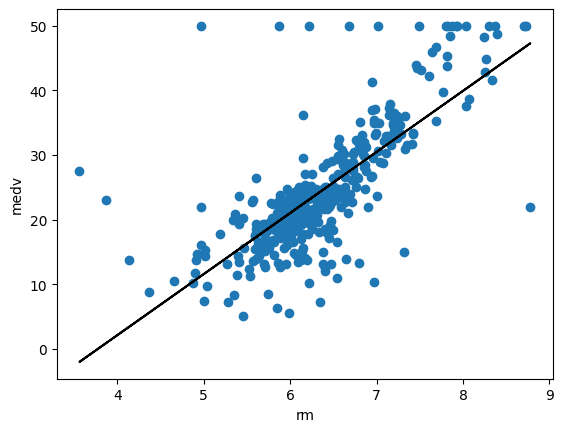

In [67]:
plt.scatter(train["rm"],train["medv"])
plt.plot(X_train,coefficients[0]*X_train+intercept,color="black")
plt.xlabel("rm")
plt.ylabel("medv")
plt.show()

In [68]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 55.29127651840969
R-squared: 0.31405082690565944
